# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [132]:
import pandas as pd
import numpy as np
import re
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [133]:
# Run this code:
fifa_read = pd.read_csv('fifa.csv')
fifa = fifa_read.copy()

Let's examine the dataset by looking at the `head`.

In [134]:
# Your code here:
print(fifa.shape)
fifa.head(5)

(18207, 20)


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [135]:
def get_numeric(value):
    value = value.replace('€', '')   
    if 'K' in value:
        return float(value.replace('K', '')) *1000
    elif 'M' in value:
        return float(value.replace('M', '')) *1000000
    else:
        return float(value)
fifa['ValueNumeric']=fifa["Value"].apply(get_numeric)
fifa.head(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


In [ ]:
#trying another way of solving the issue_  ask
def RemoveNonNumeric(row):
    row = str(row)
    dicti = {
        '€':'',
        'M':'',
        'K':''
    }
    for key,value in dicti:
        if key in row:
            row = row.replace(key,value)
            if key == 'K':
                row = float(row)/1000
    return float(row)

fifa["ValueNumeric"] = fifa['Value'].apply(RemoveNonNumeric)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [136]:
import statsmodels.api as sm
# used here only to load the dataset
from statsmodels.formula.api import ols
#OLS regression

#https://www.statsmodels.org/dev/example_formulas.html

In [115]:
#subset columns, and remove missing observations
fifa_s = fifa[[x for x in fifa.columns if x in 
               ["Position","Preferred Foot","ValueNumeric"]]]
fifa_s.head(5)

,Preferred Foot,Position,ValueNumeric
0,Left,RF,110500000.0
1,Right,ST,77000000.0
2,Right,LW,118500000.0
3,Right,GK,72000000.0
4,Right,RCM,102000000.0


In [137]:
# Fit the model:
            #For columns that have a space in their name, it is best to refer to the column using the dataframe 
            #(For example: for column A, we will use df['A']).

formula = 'ValueNumeric ~ C(Position) + C(fifa["Preferred Foot"])'
model = ols(formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(Position),1.657002e+16,26.0,20.885022,1.634952e-96
"C(fifa[""Preferred Foot""])",2.341622e+14,1.0,7.673655,5.608990e-03
Residual,5.529029e+17,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

__Value and both Positon and Preferred foot are very dependent of each other, much more in the first case (value vs position). Therefore, we can clearly reject the Null Hypothesis in favor of the alternative one: the mean value of a player depends on its preferred foot and even more on the position where he plays.__

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [138]:
formula = 'ValueNumeric ~ C(Nationality)'
model = ols(formula=formula, data=fifa).fit()
anova_table= sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+16,163.0,6.762478,4.840477e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

__The null hypothesis is rejected again__

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [139]:
# Your code here:
fifa.isnull().sum()
fifa = fifa.dropna(axis=0)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [141]:

# X : all the features for our linear regression
x = sm.add_constant(fifa[['SprintSpeed','Stamina']])   
#Y : a series holding our solution vector for linear regression
y = fifa['ValueNumeric']

model = sm.OLS(y, x)
results = model.fit()
# It returns a linear regression model from StatsModels and the data which was used to train the model

predictions = results.predict(x)
# it returns an array of fitted values


#R^2: https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

In [142]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Sat, 20 Jul 2019   Prob (F-statistic):          8.04e-193
Time:                        21:29:05   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      0.000   -3.46e+06   -2.68e+06
SprintSpeed  2.631e+04   3565.332      7.380      0.000    1.93e+04    3.33e+04
Stamina      6.037e+04   3290.118     18.349      0.000    5.39e+04    6.68e+04
==============================================================================
Omnibus:                    22840.822   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648189.356
Skew:                           7.042   Prob(JB):                         0.00
Kurtosis:                      80.638   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Rsquared retrieve a value, between 0 and 100%, that help us to determine how well our linear model fits a set of observations. 
In this case the Rsquared value is super low, therefore it doesn't contribute to predict the variation in the data, not more of the 4,8%__ 

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [143]:
x = sm.add_constant(fifa[['Potential']])  
y = fifa['ValueNumeric']
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:29:50   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.000   -3.62e+07   -3.47e+07
Potential   5.312e+05   5581.083     95.172      0.000     5.2e+05    5.42e+05
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.995
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

__The model seems to be best fitted than the previous one. The Rsquared value is 0,33, which means that the built model only predicts the variation of 33% of the data__

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

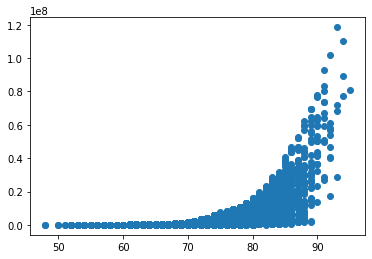

In [148]:
plt.scatter(fifa["Potential"],fifa["ValueNumeric"])
# not linear but exponential